In [35]:
import math
import meep as mp
from meep import mpb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Patch
from matplotlib.ticker import FormatStrFormatter

In [8]:
num_bands = 2
resolution = 32
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                              basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))
geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12.96))]

k_points = [
    mp.Vector3(),               # Gamma
    mp.Vector3(y=0.5),          # M
    mp.Vector3(1 / -3, 1 / 3),  # K
    mp.Vector3(),               # Gamma
]
k_points = mp.interpolate(4, k_points)
default_material = mp.Medium(epsilon=2.4)

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands,
    default_material=default_material,
)
num_x = 30
results = []
radii = np.linspace(0., 0.5, num=num_x)
for r in radii:
    geometry = [mp.Cylinder(r, material=mp.Medium(epsilon=12.96))]
    ms.geometry = geometry
    ms.run_tm()
    if len(ms.gap_list) > 0:
        results.append(ms.gap_list[0])
    else: results.append((0, 0, 0))

Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Vector3<-0.2, 0.39999999999999997, 0.0>
  Vector3<-0.26666666666666666, 0.36666666666666664, 0.0>
  Vector3<-0.3333333333333333, 0.3333333333333333, 0.0>
  Vector3<-0.26666666666666666, 0.26666666666666666, 0.0>
  Vector3<-0.19999999999999998, 0.19999999999999998, 0.0>
  Vector3<-0.1333333333333333, 0.1333333333333333, 0.0>
  Vector3<-0.06666666666666665, 0.06666666666666665, 0.0>
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.0020432472229003906
Outputting epsilon.h5...
elapsed time for k point: 0.015569686889648438
elapsed time for k point: 0.014332056045532227
elapsed time for k point: 0.003877878189086914
elapse

In [9]:
radii

array([0.        , 0.01724138, 0.03448276, 0.05172414, 0.06896552,
       0.0862069 , 0.10344828, 0.12068966, 0.13793103, 0.15517241,
       0.17241379, 0.18965517, 0.20689655, 0.22413793, 0.24137931,
       0.25862069, 0.27586207, 0.29310345, 0.31034483, 0.32758621,
       0.34482759, 0.36206897, 0.37931034, 0.39655172, 0.4137931 ,
       0.43103448, 0.44827586, 0.46551724, 0.48275862, 0.5       ])

In [10]:
polypoints = [(r, b[2]) for r, b in zip(radii, results) if b != (0, 0, 0)]
polypoints.extend([(r, b[1]) for r, b in zip(radii, results) if b != (0, 0, 0)][::-1])

In [11]:
max_idx = np.argmax([b[0] for b in results])
max_gap_centre = np.mean(results[max_idx][1:])
max_gap_half = results[max_idx][2] - max_gap_centre

In [12]:
print(radii[np.argmax([b[0] for b in results])])

0.22413793103448276


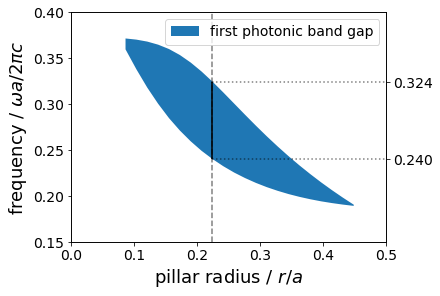

In [37]:
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['legend.fontsize'] = 14

fig, ax = plt.subplots(constrained_layout=True)
poly = Polygon(polypoints)
ax.errorbar(radii[max_idx], max_gap_centre, yerr=max_gap_half, color='black')
ax.plot([radii[max_idx], 0.5], [results[max_idx][2]]*2, color='black', ls=':', alpha=0.5)
ax.plot([radii[max_idx], 0.5], [results[max_idx][1]]*2, color='black', ls=':', alpha=0.5)
ax.axvline(radii[max_idx], ls='--', color='black', alpha=0.5, zorder=3)
ax.add_patch(poly)
ax.legend(handles=[Patch(facecolor='C0', label='first photonic band gap')], loc='upper right')
ax.set_xlim([0, 0.5])
ax.set_ylim([0.15, 0.4])
axy = ax.twinx()
axy.set_xlim([0, 0.5])
axy.set_ylim([0.15, 0.4])
axy.set_yticks([results[max_idx][2], results[max_idx][1]])
axy.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_xlabel(r'pillar radius / $r/a$')
ax.set_ylabel(r'frequency / $\omega a/2\pi c$')
fig.savefig('bandgap_vs_ratio.pdf')

In [2]:
print('TM gaps')
for gap in tm_gaps:
    print(gap)
print('TE gaps')
for gap in te_gaps:
    print(gap)

TM gaps
(47.39883483253789, 0.2746902260167482, 0.4453310810690987)
(5.6740639480231065, 0.5605607990535272, 0.5932960878698785)
(0.014223870207005853, 0.7907195975678281, 0.7908320764965159)
(0.017161966966868752, 0.8374511179880573, 0.8375948534062025)
(0.22277612770986174, 0.8672009266363844, 0.8691349976044138)
TE gaps
(0.007916179285617626, 0.5631059454933676, 0.5631505237340275)
(5.190482251642612, 0.8214230165372104, 0.8651948161669857)
